# AI-Driven Product Recommendation System
## Amazon Products Dataset (2023)

### Project Objective
This project builds an end-to-end product recommendation and customer analysis system
inspired by real-world e-commerce platforms like Amazon.

The goals of this project are:
- To analyze product trends using exploratory data analysis (EDA)
- To simulate realistic customer purchase behavior
- To segment customers using RFM and Cohort Analysis
- To generate personalized product recommendations

### Dataset
Source: Amazon Products Dataset (Kaggle, 2023)

Note:
The dataset does not contain customer purchase history.
Therefore, realistic synthetic users and transactions are generated
for academic and analytical purposes.

In [2]:
# Basic Python libraries
import os
import glob
import random
from datetime import datetime, timedelta

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

print("All libraries imported successfully")

All libraries imported successfully


## Step 1: Loading Amazon Product Dataset

The Amazon dataset consists of multiple CSV files, each representing
a different product category.

In this step:
- We load all CSV files from the data/raw folder
- Combine them into a single DataFrame
- Inspect the basic structure of the data

In [3]:
# Path to raw data folder
DATA_PATH = "../data/raw"

# Get list of all CSV files
csv_files = glob.glob(os.path.join(DATA_PATH, "*.csv"))

print(f"Total CSV files found: {len(csv_files)}")

# Show first 5 file names
csv_files[:5]

Total CSV files found: 140


['../data/raw/Suitcases and Trolley Bags.csv',
 '../data/raw/Amazon Fashion.csv',
 '../data/raw/Kitchen Storage and Containers.csv',
 '../data/raw/Coffee Tea and Beverages.csv',
 '../data/raw/Running.csv']

In [4]:
# Empty list to store individual dataframes
dataframes = []

# Loop through each CSV file and load it
for file in csv_files:
    try:
        df = pd.read_csv(file)
        df["source_file"] = os.path.basename(file)  # track category source
        dataframes.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Combine all dataframes
amazon_df = pd.concat(dataframes, ignore_index=True)

print("Combined dataset shape:", amazon_df.shape)

Combined dataset shape: (1103170, 11)


In [5]:
# Preview first 5 rows
amazon_df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,source_file,Unnamed: 0
0,Skybags Treble-FIFA 68cm Printed Polycarbonate...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/71C5GfgxW2...,https://www.amazon.in/Skybags-Treble-FIFA-Prin...,4.5,2,"₹7,250","₹14,500",Suitcases and Trolley Bags.csv,NaN
1,Tommy Hilfiger Plastic Hard 66 cms Luggage (89...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/41lIioNQ3N...,https://www.amazon.in/Tommy-Hilfiger-Luggage-8...,3.6,70,"₹6,399","₹7,999",Suitcases and Trolley Bags.csv,NaN
2,Samsonite Polyester Hard 68 Cms Luggage- Suitc...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/71XSVc5fxg...,https://www.amazon.in/Samsonite-Polyester-Lugg...,4.0,5,"₹12,220","₹18,800",Suitcases and Trolley Bags.csv,NaN
3,Skybags Polycarbonate Hard 21 Cms Suitcase(_Blue),bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/51euSZMWAn...,https://www.amazon.in/Skybags-Combo-Polycarbon...,4.4,66,"₹6,648","₹10,043.04",Suitcases and Trolley Bags.csv,NaN
4,Skybags Game-ON FIFA 79cm Printed Polycarbonat...,bags & luggage,Suitcases & Trolley Bags,https://m.media-amazon.com/images/I/710caoNQ4X...,https://www.amazon.in/Skybags-Printed-Polycarb...,4.3,5,"₹6,850","₹17,400",Suitcases and Trolley Bags.csv,NaN


## Step 2: Understanding the Dataset

Before cleaning or analysis, it is important to understand:
- What columns exist
- What type of data each column contains
- Whether there are missing or inconsistent values

In [6]:
# Display column names
amazon_df.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price', 'source_file',
       'Unnamed: 0'],
      dtype='object')

In [7]:
# Dataset information
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   name            1103170 non-null  object 
 1   main_category   1103170 non-null  object 
 2   sub_category    1103170 non-null  object 
 3   image           1103170 non-null  object 
 4   link            1103170 non-null  object 
 5   ratings         751582 non-null   object 
 6   no_of_ratings   751582 non-null   object 
 7   discount_price  980844 non-null   object 
 8   actual_price    1067544 non-null  object 
 9   source_file     1103170 non-null  object 
 10  Unnamed: 0      551585 non-null   float64
dtypes: float64(1), object(10)
memory usage: 92.6+ MB


In [8]:
# Check missing values in each column
amazon_df.isnull().sum()

name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           351588
no_of_ratings     351588
discount_price    122326
actual_price       35626
source_file            0
Unnamed: 0        551585
dtype: int64

In [9]:
# Summary statistics for numeric columns
amazon_df.describe()

,Unnamed: 0
count,551585.000000
mean,7006.200471
std,5740.835523
min,0.000000
25%,1550.000000
50%,5933.000000
75%,11482.000000
max,19199.000000


## Step 3: Data Cleaning and Preparation

Real-world datasets often contain missing values, incorrect data types,
and unnecessary columns.

In this step, we:
- Remove irrelevant columns
- Convert price and rating columns to numeric format
- Handle missing values safely

In [10]:
# Drop unnecessary column
amazon_df.drop(columns=["Unnamed: 0"], inplace=True)

print("Column dropped successfully")

Column dropped successfully


In [11]:
# Function to clean price columns
def clean_price(column):
    return (
        column
        .str.replace("₹", "", regex=False)
        .str.replace(",", "", regex=False)
        .astype(float)
    )

# Apply cleaning
amazon_df["discount_price"] = clean_price(amazon_df["discount_price"])
amazon_df["actual_price"] = clean_price(amazon_df["actual_price"])

print("Price columns cleaned")

Price columns cleaned


In [12]:
# SAFELY extract numeric values from ratings
amazon_df["ratings"] = (
    amazon_df["ratings"]
    .astype(str)
    .str.extract(r"(\d+\.?\d*)")
    .astype(float)
)

# SAFELY extract numeric values from number of ratings
amazon_df["no_of_ratings"] = (
    amazon_df["no_of_ratings"]
    .astype(str)
    .str.extract(r"(\d+)")
    .astype(float)
)

print("Ratings and number of ratings cleaned safely")

Ratings and number of ratings cleaned safely


In [13]:
# Fill missing ratings with median
amazon_df["ratings"].fillna(amazon_df["ratings"].median(), inplace=True)

# Fill missing number of ratings with 0
amazon_df["no_of_ratings"].fillna(0, inplace=True)

# Fill missing discount price using actual price
amazon_df["discount_price"].fillna(amazon_df["actual_price"], inplace=True)

print("Missing values handled successfully")

Missing values handled successfully


In [14]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   name            1103170 non-null  object 
 1   main_category   1103170 non-null  object 
 2   sub_category    1103170 non-null  object 
 3   image           1103170 non-null  object 
 4   link            1103170 non-null  object 
 5   ratings         1103170 non-null  float64
 6   no_of_ratings   1103170 non-null  float64
 7   discount_price  1067544 non-null  float64
 8   actual_price    1067544 non-null  float64
 9   source_file     1103170 non-null  object 
dtypes: float64(4), object(6)
memory usage: 84.2+ MB


The scraped dataset contained non-numeric text values such as product availability information within numeric fields. These were handled using regex-based numeric extraction followed by safe imputation.

## Step 4: Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps us understand market trends and product behavior
before applying any machine learning techniques.

In this section, we analyze:
- Product category distribution
- Price patterns
- Ratings distribution
- Popular product categories

In [15]:
# Top 10 product categories by number of products
top_categories = amazon_df["main_category"].value_counts().head(10)

top_categories

main_category
accessories            232282
men's clothing         153312
women's clothing       153024
tv, audio & cameras    137318
men's shoes            114912
appliances              66192
stores                  65806
home & kitchen          29136
kids' fashion           26976
sports & fitness        25296
Name: count, dtype: int64

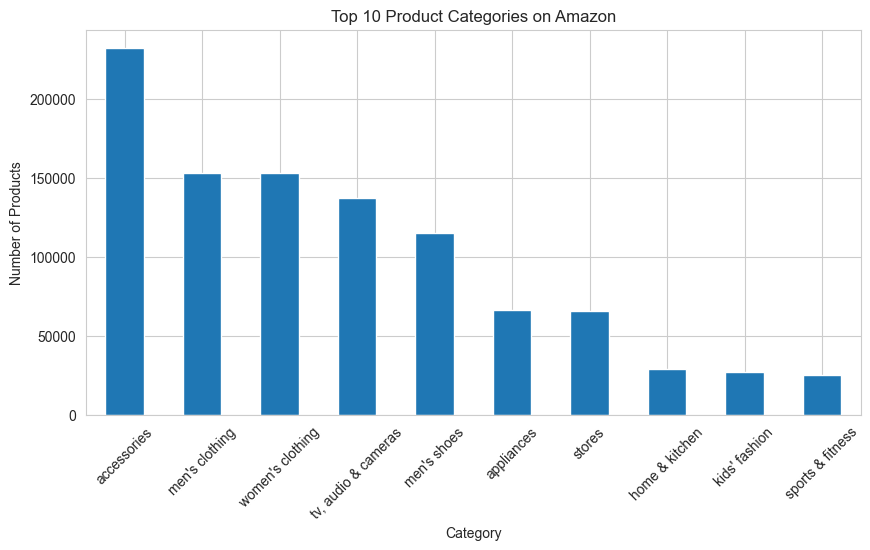

In [16]:
plt.figure(figsize=(10, 5))
top_categories.plot(kind="bar")
plt.title("Top 10 Product Categories on Amazon")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

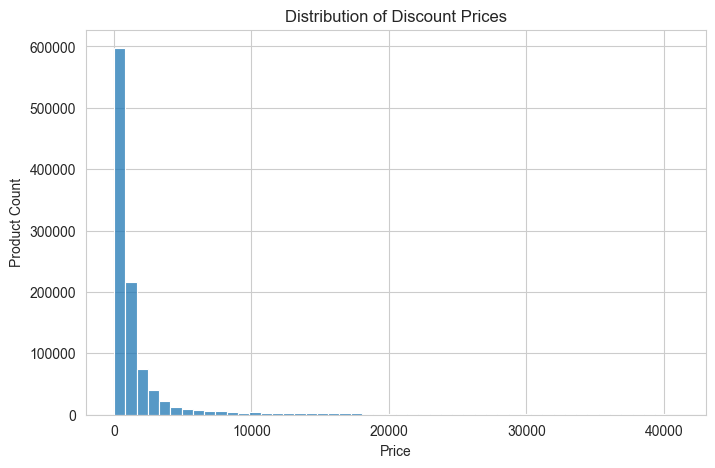

In [17]:
# Remove extreme outliers for visualization
price_data = amazon_df["discount_price"].dropna()
price_data = price_data[price_data < price_data.quantile(0.99)]

plt.figure(figsize=(8, 5))
sns.histplot(price_data, bins=50)
plt.title("Distribution of Discount Prices")
plt.xlabel("Price")
plt.ylabel("Product Count")
plt.show()

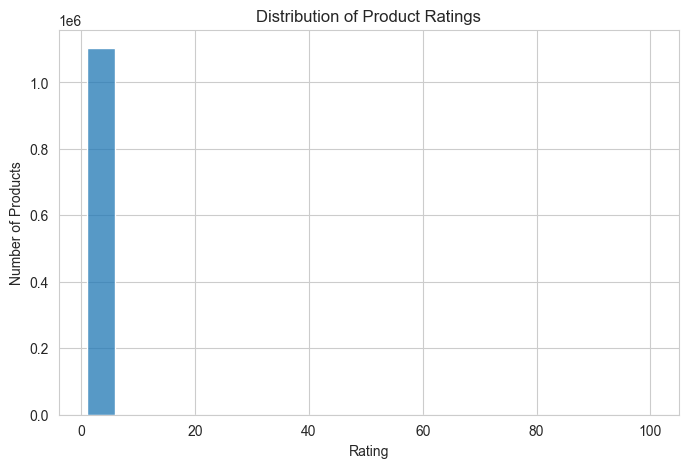

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(amazon_df["ratings"], bins=20)
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Products")
plt.show()

In [19]:
# Top 10 most reviewed products
popular_products = amazon_df.sort_values(
    by="no_of_ratings", ascending=False
).head(10)[["name", "main_category", "ratings", "no_of_ratings"]]

popular_products

,name,main_category,ratings,no_of_ratings
260007,Joyful Plastic Drawer Organizer Self Standard ...,home & kitchen,4.3,999.0
21715,GoSriKi Women's Cotton Blend Kurta with Palazz...,women's clothing,3.8,999.0
138767,"BY4U Laptop Tabletop Stand for Desk, Portable ...","tv, audio & cameras",4.0,999.0
381684,"BY4U Laptop Tabletop Stand for Desk, Portable ...","tv, audio & cameras",4.0,999.0
419609,VEGA Smooth Curl 19 mm Barrel Hair Curler With...,beauty & health,4.2,999.0
863389,"SHREGO Peanut Plus Roasted Peanut Salted 360G,...",toys & baby products,4.0,999.0
286485,Just Herbs Retractable 2 in 1 Herbal Eyeliner ...,beauty & health,4.2,999.0
259936,ARISTO Multipurpose Plastic Storage Container ...,home & kitchen,4.2,999.0
240990,"SHREGO Peanut Plus Roasted Peanut Salted 360G,...",toys & baby products,4.0,999.0
380845,"Apple Watch SE (GPS + Cellular, 44mm) - Space ...","tv, audio & cameras",4.6,999.0


## Step 5: Simulating Users and Purchase History

The original Amazon product dataset does not contain customer-level
purchase data.

To enable customer analytics such as:
- RFM Analysis
- Cohort Analysis
- Recommendation Systems

we generate realistic synthetic users and purchase transactions.
This approach is commonly used in academic and industry prototyping
when real user data is unavailable.

In [20]:
# Create unique product IDs
amazon_df = amazon_df.reset_index(drop=True)
amazon_df["product_id"] = amazon_df.index.astype(str)

print("Product IDs created")

Product IDs created


In [21]:
# Number of synthetic users
NUM_USERS = 100_000

# Generate user IDs
user_ids = [f"U{str(i).zfill(6)}" for i in range(1, NUM_USERS + 1)]

print("Total users created:", len(user_ids))

Total users created: 100000


In [22]:
# Define purchase date range (2023)
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)

def random_date(start, end):
    delta = end - start
    random_days = random.randint(0, delta.days)
    return start + timedelta(days=random_days)

In [23]:
# FAST transaction generation using vectorization

NUM_TRANSACTIONS = 1_000_000

# Randomly select users
transaction_users = np.random.choice(user_ids, size=NUM_TRANSACTIONS)

# Randomly select products by index (FAST)
product_indices = np.random.randint(
    0, len(amazon_df), size=NUM_TRANSACTIONS
)

# Build transactions dataframe
transactions_df = pd.DataFrame({
    "user_id": transaction_users,
    "product_id": amazon_df.loc[product_indices, "product_id"].values,
    "category": amazon_df.loc[product_indices, "main_category"].values,
    "price_paid": amazon_df.loc[product_indices, "discount_price"].values,
    "purchase_date": [
        random_date(start_date, end_date) for _ in range(NUM_TRANSACTIONS)
    ],
    "quantity": np.random.randint(1, 4, size=NUM_TRANSACTIONS)
})

print("Transactions created:", transactions_df.shape)

Transactions created: (1000000, 6)


In [24]:
transactions_df.head()

,user_id,product_id,category,price_paid,purchase_date,quantity
0,U004049,727968,women's clothing,485.0,2023-12-19,1
1,U080140,884980,accessories,714.0,2023-08-01,1
2,U064513,682429,accessories,1709.0,2023-12-25,3
3,U093970,568357,accessories,21120.0,2023-08-24,2
4,U053925,505413,women's clothing,325.0,2023-09-14,3


## Step 6: RFM Analysis (Customer Segmentation)

RFM Analysis is a widely used marketing analytics technique to segment
customers based on their purchasing behavior.

It measures:
- Recency: How recently a customer made a purchase
- Frequency: How often a customer purchases
- Monetary: How much a customer spends

This helps identify high-value customers, loyal customers, and at-risk users.

In [25]:
# Reference date (end of dataset period)
REFERENCE_DATE = datetime(2023, 12, 31)

In [26]:
# Aggregate transactions to compute RFM
rfm_df = transactions_df.groupby("user_id").agg({
    "purchase_date": lambda x: (REFERENCE_DATE - x.max()).days,  # Recency
    "user_id": "count",                                           # Frequency
    "price_paid": "sum"                                           # Monetary
}).rename(columns={
    "purchase_date": "recency",
    "user_id": "frequency",
    "price_paid": "monetary"
})

rfm_df.head()

,recency,frequency,monetary
user_id,,,
U000001,8,10,12358.00
U000002,63,10,9099.00
U000003,1,9,8490.90
U000004,4,15,63766.84
U000005,4,13,57773.20


In [27]:
rfm_df.describe()

,recency,frequency,monetary
count,99997.000000,99997.000000,99997.000000
mean,35.856106,10.000300,27708.604354
std,36.107273,3.160762,30260.791469
min,0.000000,1.000000,0.000000
25%,10.000000,8.000000,9080.000000
50%,25.000000,10.000000,17663.000000
75%,50.000000,12.000000,35650.200000
max,362.000000,28.000000,640716.000000


In [28]:
# Create RFM scores using quantiles
rfm_df["R_score"] = pd.qcut(rfm_df["recency"], 5, labels=[5,4,3,2,1])
rfm_df["F_score"] = pd.qcut(rfm_df["frequency"], 5, labels=[1,2,3,4,5])
rfm_df["M_score"] = pd.qcut(rfm_df["monetary"], 5, labels=[1,2,3,4,5])

rfm_df.head()

,recency,frequency,monetary,R_score,F_score,M_score
user_id,,,,,,
U000001,8,10,12358.00,5,3,2
U000002,63,10,9099.00,1,3,2
U000003,1,9,8490.90,5,2,2
U000004,4,15,63766.84,5,5,5
U000005,4,13,57773.20,5,4,5


In [29]:
# Combine RFM scores
rfm_df["RFM_score"] = (
    rfm_df["R_score"].astype(str) +
    rfm_df["F_score"].astype(str) +
    rfm_df["M_score"].astype(str)
)

# Define segments
# Corrected customer segmentation function (INT comparisons)
def segment_customer(row):
    if row["R_score"] >= 4 and row["F_score"] >= 4 and row["M_score"] >= 4:
        return "Big Spender"
    elif row["R_score"] >= 4 and row["F_score"] >= 3:
        return "Loyal Customer"
    elif row["R_score"] <= 2 and row["F_score"] <= 2:
        return "At Risk"
    else:
        return "Regular Customer"

rfm_df["segment"] = rfm_df.apply(segment_customer, axis=1)

rfm_df["segment"].value_counts()

segment
Regular Customer    51473
At Risk             22658
Loyal Customer      16679
Big Spender          9187
Name: count, dtype: int64

### RFM Segmentation Insights

- Big Spenders: High-value customers who should be prioritized for upselling
- Loyal Customers: Frequent buyers suitable for loyalty programs
- At-Risk Customers: Users who may churn and require targeted offers
- Regular Customers: Average users with stable behavior

## Step 7: Cohort Analysis (Customer Retention)

Cohort Analysis groups customers based on the month of their first purchase
and tracks their activity over time.

This helps analyze:
- Customer retention trends
- Long-term engagement patterns
- Quality of users acquired in different months

In [30]:
# Convert purchase_date to datetime (safety check)
transactions_df["purchase_date"] = pd.to_datetime(transactions_df["purchase_date"])

# Create purchase month
transactions_df["purchase_month"] = transactions_df["purchase_date"].dt.to_period("M")

In [31]:
# Determine each user's first purchase month
first_purchase = transactions_df.groupby("user_id")["purchase_month"].min()

# Map cohort month to transactions
transactions_df["cohort_month"] = transactions_df["user_id"].map(first_purchase)

transactions_df.head()

,user_id,product_id,category,price_paid,purchase_date,quantity,purchase_month,cohort_month
0,U004049,727968,women's clothing,485.0,2023-12-19,1,2023-12,2023-02
1,U080140,884980,accessories,714.0,2023-08-01,1,2023-08,2023-01
2,U064513,682429,accessories,1709.0,2023-12-25,3,2023-12,2023-01
3,U093970,568357,accessories,21120.0,2023-08-24,2,2023-08,2023-03
4,U053925,505413,women's clothing,325.0,2023-09-14,3,2023-09,2023-01


In [32]:
# Calculate the number of months since first purchase
def cohort_index(row):
    return (row["purchase_month"].year - row["cohort_month"].year) * 12 + \
           (row["purchase_month"].month - row["cohort_month"].month) + 1

transactions_df["cohort_index"] = transactions_df.apply(cohort_index, axis=1)

In [33]:
# Count unique users per cohort and month index
cohort_data = (
    transactions_df
    .groupby(["cohort_month", "cohort_index"])["user_id"]
    .nunique()
    .reset_index()
)

# Pivot to cohort table
cohort_table = cohort_data.pivot(
    index="cohort_month",
    columns="cohort_index",
    values="user_id"
)

cohort_table.head()

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2023-01,57286.0,30876.0,32672.0,32284.0,32803.0,32093.0,32705.0,32701.0,32251.0,32835.0,32008.0,32860.0
2023-02,22717.0,12986.0,12754.0,13137.0,12575.0,13119.0,12889.0,12805.0,12948.0,12714.0,13043.0,NaN
2023-03,11390.0,6251.0,6472.0,6360.0,6431.0,6373.0,6451.0,6480.0,6306.0,6507.0,NaN,NaN
2023-04,4853.0,2742.0,2771.0,2686.0,2749.0,2696.0,2764.0,2794.0,2758.0,NaN,NaN,NaN
2023-05,2177.0,1189.0,1224.0,1229.0,1219.0,1327.0,1185.0,1273.0,NaN,NaN,NaN,NaN


In [34]:
# Calculate retention rates
cohort_sizes = cohort_table.iloc[:, 0]
retention_table = cohort_table.divide(cohort_sizes, axis=0)

retention_table.head()

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2023-01,1.0,0.538980,0.570331,0.563558,0.572618,0.560224,0.570907,0.570838,0.562982,0.573177,0.558740,0.573613
2023-02,1.0,0.571642,0.561430,0.578289,0.553550,0.577497,0.567372,0.563675,0.569970,0.559669,0.574152,NaN
2023-03,1.0,0.548815,0.568218,0.558385,0.564618,0.559526,0.566374,0.568920,0.553644,0.571291,NaN,NaN
2023-04,1.0,0.565011,0.570987,0.553472,0.566454,0.555533,0.569545,0.575726,0.568308,NaN,NaN,NaN
2023-05,1.0,0.546164,0.562242,0.564538,0.559945,0.609554,0.544327,0.584750,NaN,NaN,NaN,NaN


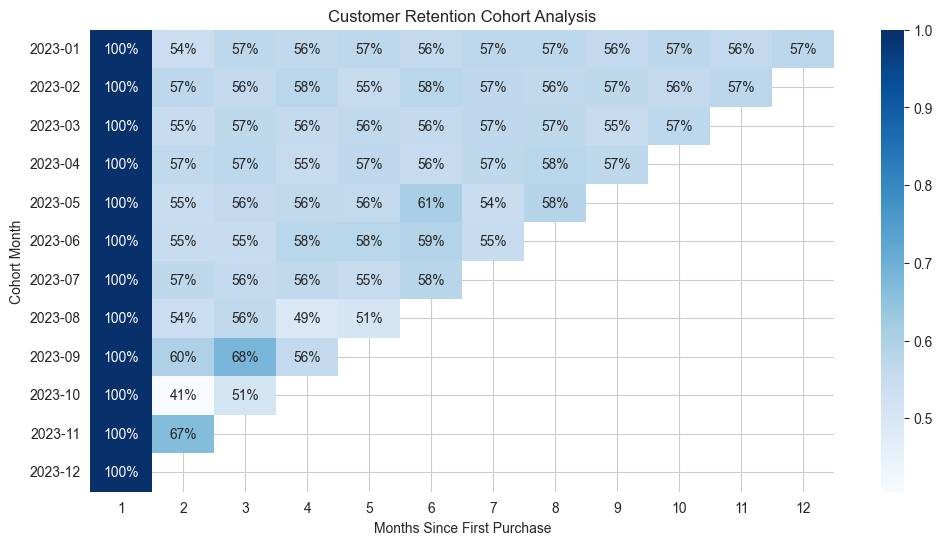

In [35]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    retention_table,
    annot=True,
    fmt=".0%",
    cmap="Blues"
)
plt.title("Customer Retention Cohort Analysis")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Cohort Month")
plt.show()

### Cohort Analysis Insights

- Customer retention decreases over time, which is expected in e-commerce
- Some monthly cohorts show better long-term engagement
- These insights can help businesses optimize marketing spend and retention strategies

## Step 8: Product Recommendation System

This section builds a hybrid recommendation system that adapts
recommendations based on customer type and behavior.

Strategies used:
- Popularity-based recommendations (for new users)
- Category-based recommendations (for returning users)
- Upselling strategies (for high-value customers)

In [36]:
# Top popular products based on number of ratings
popular_products = (
    amazon_df
    .sort_values(by="no_of_ratings", ascending=False)
    .head(20)
    [["product_id", "name", "main_category", "ratings", "discount_price"]]
)

popular_products.head()

,product_id,name,main_category,ratings,discount_price
260007,260007,Joyful Plastic Drawer Organizer Self Standard ...,home & kitchen,4.3,1749.0
21715,21715,GoSriKi Women's Cotton Blend Kurta with Palazz...,women's clothing,3.8,679.0
138767,138767,"BY4U Laptop Tabletop Stand for Desk, Portable ...","tv, audio & cameras",4.0,445.0
381684,381684,"BY4U Laptop Tabletop Stand for Desk, Portable ...","tv, audio & cameras",4.0,445.0
419609,419609,VEGA Smooth Curl 19 mm Barrel Hair Curler With...,beauty & health,4.2,1447.0


In [ ]:
#USER PURCHASE HISTORY HELPER FUNCTION
def get_user_history(user_id, transactions_df, amazon_df):
    user_products = transactions_df[
        transactions_df["user_id"] == user_id
    ]["product_id"].unique()
    
    return amazon_df[amazon_df["product_id"].isin(user_products)]

In [40]:
#CATEGORY-BASED RECOMMENDATION (RETURNING USERS)
def recommend_by_category(user_id, transactions_df, amazon_df, n=5):
    history = get_user_history(user_id, transactions_df, amazon_df)
    
    if history.empty:
        return popular_products.head(n)
    
    top_category = history["main_category"].value_counts().idxmax()
    
    recommendations = amazon_df[
        (amazon_df["main_category"] == top_category) &
        (~amazon_df["product_id"].isin(history["product_id"]))
    ]
    
    return recommendations.sort_values(
        by=["ratings", "no_of_ratings"], ascending=False
    ).head(n)

In [41]:
#UPSELL LOGIC FOR BIG SPENDERS 💰
def upsell_recommendations(user_id, rfm_df, amazon_df, n=5):
    segment = rfm_df.loc[user_id, "segment"]
    
    if segment != "Big Spender":
        return None
    
    premium_products = amazon_df[
        amazon_df["discount_price"] > amazon_df["discount_price"].quantile(0.90)
    ]
    
    return premium_products.sort_values(
        by=["ratings", "no_of_ratings"], ascending=False
    ).head(n)

In [42]:
#MASTER RECOMMENDATION FUNCTION (IMPORTANT)
def recommend_products(user_id):
    if user_id not in transactions_df["user_id"].values:
        return popular_products.head(5)
    
    upsell = upsell_recommendations(user_id, rfm_df, amazon_df)
    if upsell is not None:
        return upsell
    
    return recommend_by_category(user_id, transactions_df, amazon_df)

In [43]:
#TEST THE SYSTEM 
# Example users
sample_users = rfm_df.sample(3).index.tolist()

for user in sample_users:
    print(f"\nRecommendations for User: {user}")
    display(recommend_products(user))


Recommendations for User: U056597


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,source_file,product_id
318717,Lengthy Handle Shoulder Bag - Hand Made Wire K...,accessories,Handbags & Clutches,https://m.media-amazon.com/images/I/41YbHBabOg...,https://www.amazon.in/Lengthy-handle-Shoulder-...,65.0,6.0,765.0,1200.0,Handbags and Clutches.csv,318717
584844,Lengthy Handle Shoulder Bag - Hand Made Wire K...,accessories,Handbags & Clutches,https://m.media-amazon.com/images/I/41YbHBabOg...,https://www.amazon.in/Lengthy-handle-Shoulder-...,65.0,6.0,765.0,1200.0,Amazon-Products.csv,584844
412787,"RYLAN Travel Bag 40 Cm Travel Duffel Bag, Expa...",accessories,Bags & Luggage,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/RYLAN-Expandable-Lightwe...,5.0,67.0,849.0,1199.0,Amazon-Products.csv,412787
1031505,"RYLAN Travel Bag 40 Cm Travel Duffel Bag, Expa...",accessories,Bags & Luggage,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/RYLAN-Expandable-Lightwe...,5.0,67.0,849.0,1199.0,Bags and Luggage.csv,1031505
399400,"Umbrella Umbrella for Men, Umberallas for Rain...",accessories,Bags & Luggage,https://m.media-amazon.com/images/I/613wKVstqy...,https://www.amazon.in/Umbrella-Umberallas-Wind...,5.0,62.0,699.0,2899.0,Amazon-Products.csv,399400



Recommendations for User: U008420


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,source_file,product_id
318717,Lengthy Handle Shoulder Bag - Hand Made Wire K...,accessories,Handbags & Clutches,https://m.media-amazon.com/images/I/41YbHBabOg...,https://www.amazon.in/Lengthy-handle-Shoulder-...,65.0,6.0,765.0,1200.0,Handbags and Clutches.csv,318717
584844,Lengthy Handle Shoulder Bag - Hand Made Wire K...,accessories,Handbags & Clutches,https://m.media-amazon.com/images/I/41YbHBabOg...,https://www.amazon.in/Lengthy-handle-Shoulder-...,65.0,6.0,765.0,1200.0,Amazon-Products.csv,584844
412787,"RYLAN Travel Bag 40 Cm Travel Duffel Bag, Expa...",accessories,Bags & Luggage,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/RYLAN-Expandable-Lightwe...,5.0,67.0,849.0,1199.0,Amazon-Products.csv,412787
1031505,"RYLAN Travel Bag 40 Cm Travel Duffel Bag, Expa...",accessories,Bags & Luggage,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/RYLAN-Expandable-Lightwe...,5.0,67.0,849.0,1199.0,Bags and Luggage.csv,1031505
399400,"Umbrella Umbrella for Men, Umberallas for Rain...",accessories,Bags & Luggage,https://m.media-amazon.com/images/I/613wKVstqy...,https://www.amazon.in/Umbrella-Umberallas-Wind...,5.0,62.0,699.0,2899.0,Amazon-Products.csv,399400



Recommendations for User: U023496


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,source_file,product_id
728916,ELECTROPRIME 1F06 Breast Soap 100g Beauty Brea...,women's clothing,Lingerie & Nightwear,https://m.media-amazon.com/images/I/31+dTwza59...,https://www.amazon.in/ELECTROPRIME-Breast-Beau...,70.0,4.0,1790.0,2166.0,Amazon-Products.csv,728916
1094371,ELECTROPRIME 1F06 Breast Soap 100g Beauty Brea...,women's clothing,Lingerie & Nightwear,https://m.media-amazon.com/images/I/31+dTwza59...,https://www.amazon.in/ELECTROPRIME-Breast-Beau...,70.0,4.0,1790.0,2166.0,Lingerie and Nightwear.csv,1094371
23375,Amazon Brand - Tavasya Women Women Saree,women's clothing,Clothing,https://m.media-amazon.com/images/I/91q9dPFdFM...,https://www.amazon.in/Amazon-Brand-Tavasya-Wom...,5.0,74.0,599.0,3999.0,Clothing.csv,23375
111434,Amazon Brand - Tavasya Women Women Saree,women's clothing,Ethnic Wear,https://m.media-amazon.com/images/I/91q9dPFdFM...,https://www.amazon.in/Amazon-Brand-Tavasya-Wom...,5.0,74.0,599.0,3999.0,Ethnic Wear.csv,111434
468084,Amazon Brand - Tavasya Women Women Saree,women's clothing,Clothing,https://m.media-amazon.com/images/I/91q9dPFdFM...,https://www.amazon.in/Amazon-Brand-Tavasya-Wom...,5.0,74.0,599.0,3999.0,Amazon-Products.csv,468084
